# Linear Regression Example

1. Design model (input and output size, forward pass)
2. Construct loss and optimizer
3. Training loop:
    - Forward pass: compute predictio and loss
    - Backward pass: gradients
    - Update weights

# Code Implementation

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
# Prepare dataset
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

In [3]:
y = y.view(y.shape[0], 1)

In [4]:
n_samples, n_features = X.shape

n_samples, n_features

(100, 1)

In [5]:
# Model
input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)

In [6]:
# Loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [7]:
# Training loop
num_epochs = 100

for epoch in range(num_epochs):
    # forward pass
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # backward pass
    loss.backward()
    
    # update
    optimizer.step()
    
    optimizer.zero_grad()
    
    if (epoch + 1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss={loss.item(): .4f}')

epoch: 10, loss= 4286.5396
epoch: 20, loss= 3201.9695
epoch: 30, loss= 2416.6533
epoch: 40, loss= 1847.4442
epoch: 50, loss= 1434.4858
epoch: 60, loss= 1134.6276
epoch: 70, loss= 916.7202
epoch: 80, loss= 758.2499
epoch: 90, loss= 642.9264
epoch: 100, loss= 558.9503


<function matplotlib.pyplot.show(close=None, block=None)>

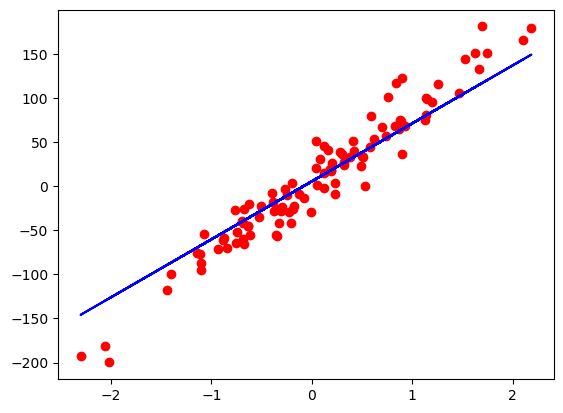

In [9]:
# Plot
predicted = model(X).detach()
predicted = predicted.numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')

plt.show